In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression

In [34]:
audi = pd.read_csv('/content/drive/MyDrive/kaggle/archive/audi.csv', sep = ',')

In [35]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [36]:
# 결측치 확인
print('audi 결측치 :', audi.isnull().sum())

audi 결측치 : model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [37]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


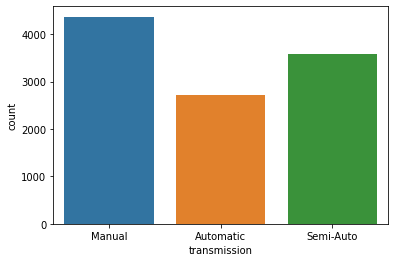

In [38]:
sns.countplot(audi['transmission'])

 A3     0.180821
 Q3     0.132827
 A4     0.129453
 A1     0.126265
 A5     0.082677
 Q5     0.082208
 Q2     0.077053
 A6     0.070116
 Q7     0.037214
 TT     0.031496
 A7     0.011436
 A8     0.011061
 Q8     0.006468
 RS6    0.003656
 RS3    0.003093
 RS4    0.002906
 RS5    0.002718
 R8     0.002625
 S3     0.001687
 SQ5    0.001500
 S4     0.001125
 SQ7    0.000750
 S8     0.000375
 S5     0.000281
 RS7    0.000094
 A2     0.000094
Name: model, dtype: float64


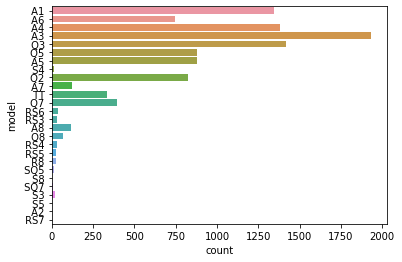

In [39]:
print(audi['model'].value_counts()/len(audi)) # 정규화 작업
sns.countplot(y = audi['model'])

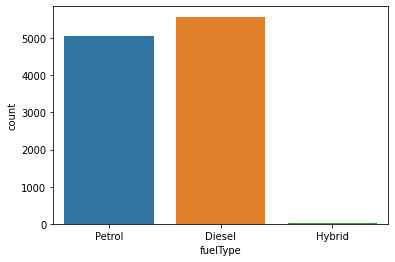

In [40]:
sns.countplot(x = audi.fuelType)

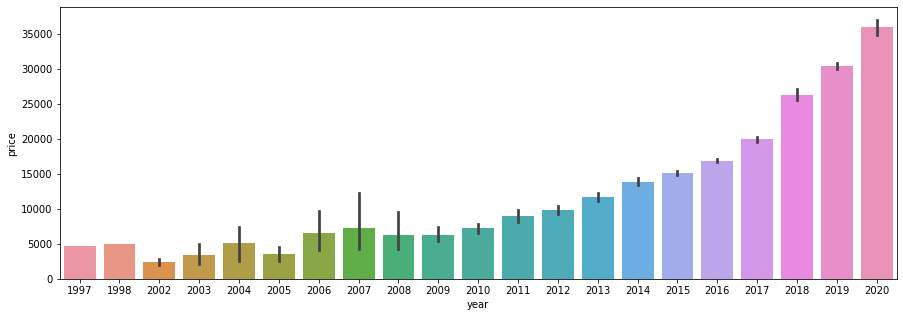

In [41]:
plt.figure(figsize = (15,5))
sns.barplot(x = audi['year'], y = audi['price'])

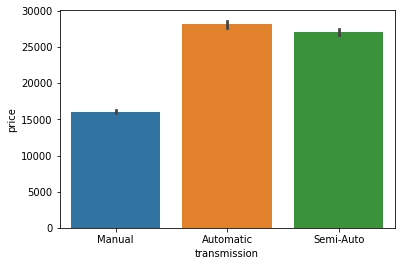

In [42]:
sns.barplot(x = audi['transmission'], y = audi['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


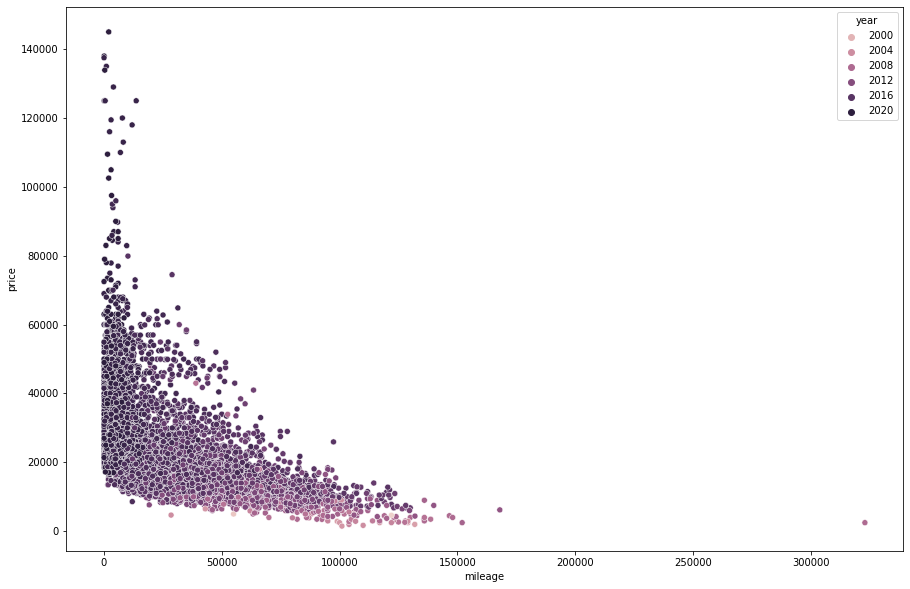

In [43]:
plt.figure(figsize = (15,10), facecolor = 'w') # facecolor = 배경색
sns.scatterplot(audi['mileage'], audi['price'], hue = audi['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


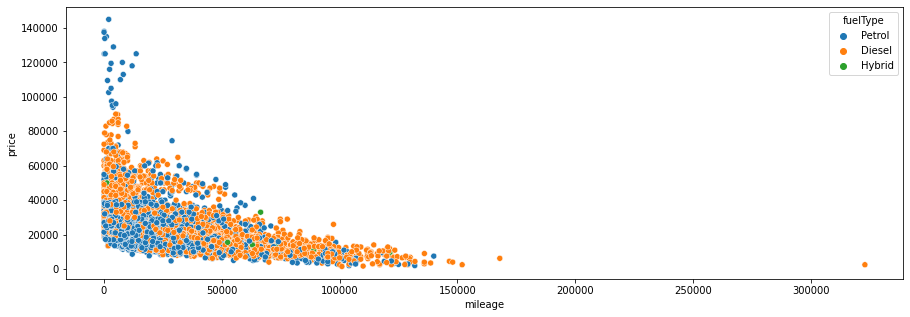

In [44]:
plt.figure(figsize = (15,5), facecolor = 'w')
sns.scatterplot(audi['mileage'], audi['price'], hue = audi['fuelType'])

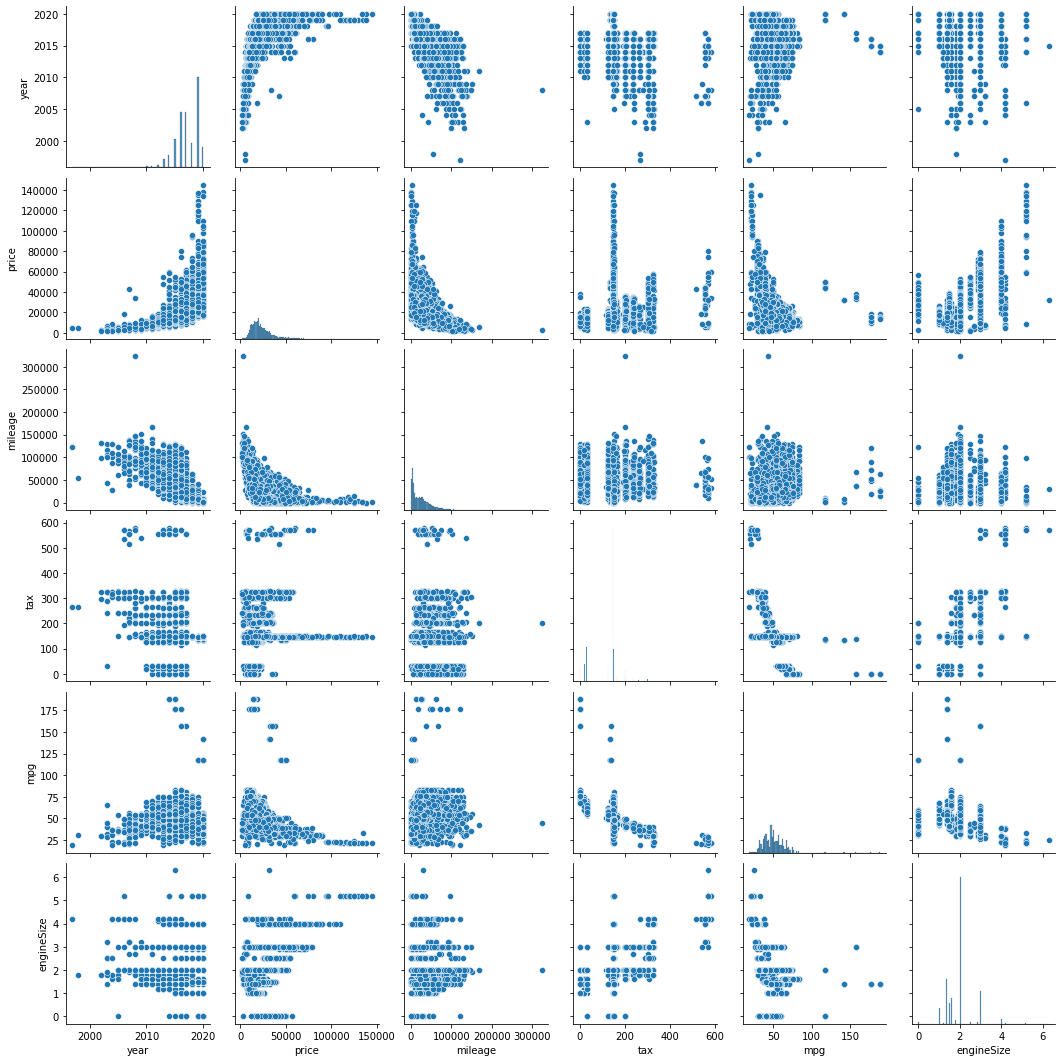

In [45]:
sns.pairplot(audi)

In [46]:
audi['age_of_car'] = 2020 - audi['year'] # 얼마나 오래되었는지?
audi = audi.drop('year', axis = 1)
audi.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
2416,A3,18910,Manual,11956,Petrol,145,60.1,1.0,2
752,A4,23995,Automatic,5363,Petrol,145,39.8,2.0,1
1326,A1,9798,Manual,29554,Diesel,0,80.7,1.6,5
2667,A6,21298,Semi-Auto,22761,Diesel,145,54.3,3.0,5
6673,A1,8995,Manual,39761,Petrol,125,53.3,1.4,7
9173,Q3,27490,Manual,3500,Petrol,145,40.9,1.5,1
1346,Q3,27444,Manual,1786,Diesel,150,42.8,2.0,1
5800,A4,18990,Semi-Auto,64049,Diesel,150,56.5,2.0,4
1418,A5,13890,Semi-Auto,66500,Diesel,125,58.9,2.0,5
2036,Q3,16898,Semi-Auto,15274,Petrol,150,47.9,1.4,4


# Pre-processing for modeling

In [47]:
audi_expanded = pd.get_dummies(audi)
audi_expanded.head(10)

,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,16500,36203,20,64.2,2.0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,11000,29946,30,55.4,1.4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,16800,25952,145,67.3,2.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,17300,1998,145,49.6,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,13900,32260,30,58.9,1.4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,13250,76788,30,61.4,2.0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7,11750,75185,20,70.6,2.0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8,10200,46112,20,60.1,1.4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,12000,22451,30,55.4,1.4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [61]:
std = StandardScaler() # 값이 중구난방이기 때문에 정규화를 해준다.
audi_expanded_std = std.fit_transform(audi_expanded) # transform으로 적용을 해줌
audi_expanded_std = pd.DataFrame(audi_expanded, columns = audi_expanded.columns) # dataFrame화 하는게 -> 행, 열 접근 용이하기 위해서
print(audi_expanded_std.shape)
audi_expanded_std.head()

(10668, 38)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,16500,36203,20,64.2,2.0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,11000,29946,30,55.4,1.4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,16800,25952,145,67.3,2.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,17300,1998,145,49.6,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(audi_expanded_std.drop('price', axis = 1), audi_expanded_std.price)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (8001, 37)
X_test: (2667, 37)
y_train: (8001,)
y_test: (2667,)


### SelectKBest 모듈
SelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divid

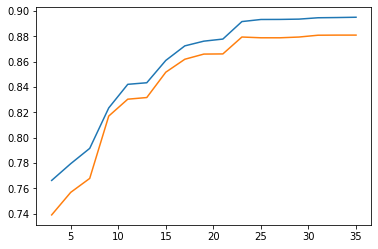

In [50]:
column_names = audi_expanded.drop('price', axis =1).columns
len(column_names)
no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 37, 2):
  selector = SelectKBest(f_regression, k = k)
  X_train_transformed = selector.fit_transform(X_train, y_train)
  X_test_transformed = selector.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train_transformed, y_train)
  no_of_features.append(k)
  r_squared_train.append(regressor.score(X_train_transformed, y_train))
  r_squared_test.append(regressor.score(X_test_transformed, y_test))

sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [51]:
selector = SelectKBest(f_regression, k = 24)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ A1',
       'model_ A3', 'model_ A4', 'model_ A7', 'model_ A8', 'model_ Q5',
       'model_ Q7', 'model_ Q8', 'model_ R8', 'model_ RS3', 'model_ RS4',
       'model_ RS5', 'model_ RS6', 'model_ SQ7', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [52]:
def regression_model(model):
  '''
  Will fit the regression model passed and will return the regressor object and the score
  '''
  regressor = model
  regressor.fit(X_train_transformed, y_train)
  score = regressor.score(X_test_transformed,y_test)
  return regressor, score

In [53]:
model_performance = pd.DataFrame(columns = ['Features', 'Model','Score'])

models_to_evaluate = [LinearRegression()]

for model in models_to_evaluate:
  regressor, score = regression_model(model)
  model_performance = model_performance.append({'Features':'Linear','Model':model,'Score':score}, ignore_index = True)

model_performance

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.878672


In [54]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2058.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:41:27   Log-Likelihood:                -77266.
No. Observations:                8001   AIC:                         1.546e+05
Df Residuals:                    7967   BIC:                         1.548e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mileage                   -0

In [55]:
while True:
  if max(regressor.pvalues) > 0.05:
    drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
    print('Dropping' + drop_variable.index[0] + 'and running regression again because pvalue is :' + str(drop_variable[0]))
    X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
    regressor = sm.OLS(y_train, X_train_dropped).fit()
  else:
    print('All p values less than 0.05')
    break

Droppingmodel_ S8and running regression again because pvalue is :0.9864309746790236
Droppingmodel_ A8and running regression again because pvalue is :0.9846835061767142
Droppingmodel_ S4and running regression again because pvalue is :0.7636872552281602
Droppingmodel_ SQ5and running regression again because pvalue is :0.09901790108922182
Droppingmodel_ RS3and running regression again because pvalue is :0.07174572068911561
All p values less than 0.05


In [56]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2341.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:41:27   Log-Likelihood:                -77269.
No. Observations:                8001   AIC:                         1.546e+05
Df Residuals:                    7971   BIC:                         1.548e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mileage                   -0

# Fitting on polynomial features

(8001, 741)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: 

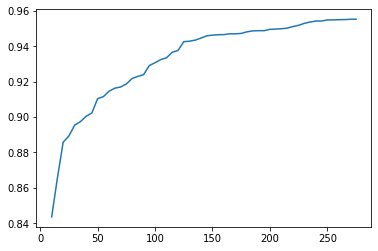

In [57]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277 , 5):
  selector = SelectKBest(f_regression, k = k)
  X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
  regressor = LinearRegression()
  regressor.fit(X_train_transformed, y_train)
  no_of_features.append(k)
  r_squared.append(regressor.score(X_train_transformed, y_train))

sns.lineplot(x = no_of_features, y = r_squared)

In [58]:
selector = SelectKBest(f_regression, k = 140)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [59]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.73196e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33271355354.61338, tolerance: 109037150.99755143
  positive)


,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.878672
1,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.938476
2,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.938585
3,Polynomial,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.935794


#### Lasso가 더 많은 정확도를 보인다.